Funcion objetivo:

Maximizar z = 70x1 + 91x2 + 50x2 + 61x4 + 21x5

Minimizar z = 170x1 + 310x2 + 60x3 + 101x4 + 11x5

sujeto a:

      x1 ≤ 15
      x2 ≤ 10
      x3 ≤ 25
      x4 ≤ 4
      x5 ≤ 30
      
      170x1 + 310x2 ≤ 3800
      60x3 + 101x4 ≤ 2800
      101x4 + 11x5 ≤ 3500

In [17]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rich.console import Console
from rich.table import Table

Nodo y Arco Consistencia


In [2]:
# Nodo Consistencia
domains = {
    'x1': [i for i in range(0,16)],
    'x2': [i for i in range(0,11)],
    'x3': [i for i in range(0,26)],
    'x4': [i for i in range(0,5)],
    'x5': [i for i in range(0,31)],
}

In [3]:
# Restricciones
constraints = {

    ('x1', 'x2'): lambda x1, x2:  170*x1 <= 3800-310*x2,
    ('x2', 'x1'): lambda x2, x1:  3800-310*x2 >= 170*x1,

    ('x3', 'x4'): lambda x3, x4:  60*x3 <= 2800-101*x4,
    ('x4', 'x3'): lambda x4, x3:  2800-101*x4 >= 60*x3,

    ('x3', 'x5'): lambda x3, x5:  60*x3 <= 3500-11*x5,
    ('x5', 'x3'): lambda x5, x3:  3500-11*x5 >= 60*x3,

}

In [4]:
# Implementación de AC3
def revise(x, y):
    revised = False
    x_domain = domains[x]
    y_domain = domains[y]
    all_constraints = [
        constraint for constraint in constraints if constraint[0] == x and constraint[1] == y]
    for x_value in x_domain:
        satisfies = False
        for y_value in y_domain:
            for constraint in all_constraints:
                constraint_func = constraints[constraint]
                if constraint_func(x_value, y_value):
                    satisfies = True
        if not satisfies:
            x_domain.remove(x_value)
            revised = True
    return revised

def ac3(arcs):
    queue = arcs[:]
    while queue:
        (x, y) = queue.pop(0)
        revised = revise(x, y)
        if revised:
            neighbors = [neighbor for neighbor in arcs if neighbor[1] == x]
            queue = queue + neighbors


In [ ]:
# Arcos de las restricciones del problema
arcs = [
    ('x1','x2'), ('x2','x1'),
    ('x3','x4'), ('x4','x3'),
    ('x3', 'x5'), ('x5','x3')
]

ac3(arcs)

print("x1: " + str(domains['x1']))
print("x2: " + str(domains['x2']))
print("x3: " + str(domains['x3']))
print("x4: " + str(domains['x4']))
print("x5: " + str(domains['x5']))

In [3]:
class Problema:
  def __init__(self, epsilon):
    self.epsilon = epsilon
    self.dimensiones = 5
    self.limites = {
      'x1': (0, 15),
      'x2': (0, 10),
      'x3': (0, 25),
      'x4': (0, 4),
      'x5': (0, 30)
    }

    self.costos = {
      'x1': 170,
      'x2': 310,
      'x3': 60,
      'x4': 101,
      'x5': 11
    }

    self.presMaxTv = 3800
    self.presMaxDyR = 2800
    self.presMaxDyR = 3500

  def check(self, x):
    # Chequeo de restricciones de presupuesto
    costo_tv = self.costos['x1'] * x[0] + self.costos['x2'] * x[1]
    costo_print = self.costos['x3'] * x[2] + self.costos['x4'] * x[3]
    costo_combined = self.costos['x3'] * x[2] + self.costos['x5'] * x[4]
        
    if costo_tv > self.presMaxTv:
      return False
    if costo_print > self.presMaxDyR:
      return False
    if costo_combined > self.presMaxDyR:
      return False

    # Chequeo de límites de cantidad de anuncios
    for i, (c_min, c_max) in enumerate(self.limites.values()):
      if not (c_min <= x[i] <= c_max):
        return False

    # Chequeo de epsilon-constraint
    totalCosto = 170 * x[0] + 310 * x[1] + 60 * x[2] + 101 * x[3] + 11 * x[4]
    if totalCosto > self.epsilon:
      return False

    return True
  
  def checkCostos(self, x):
    totalCosto = 170 * x[0] + 310 * x[1] + 60 * x[2] + 101 * x[3] + 11 * x[4]
    return totalCosto
  
  def checkQuality(self, x):
     totalQuality = 70 * x[0] + 91 * x[1] + 50 * x[2] + 61 * x[3] + 21 * x[4]
     return totalQuality

  def eval(self, x):

    # Se evalua el fitness utilizando la nueva funcion
    #return self.scalarazing(x)

    # Se evalua el fitness
    return 70 * x[0] + 91 * x[1] + 50 * x[2] + 61 * x[3] + 21 * x[4]
  

  def sigmoide(self, x, alpha, x0):
    return 1/(1+np.exp(-alpha*(x-x0)))
  
  def find_y_interval(self, y, intervals):
    interval_width = 1 / intervals
    for i in range(intervals):
        if i * interval_width <= y < (i + 1) * interval_width:
            return i
    return intervals - 1 if y == 1 else None
  
  def master_sigmoide(self, arreglo):
    parameters = [
      (0.6, 7.5, 16),    
      (1, 5, 11),        
      (0.35, 12.5, 26),  
      (2.5, 2, 5),       
      (0.3, 15, 31)      
    ]
    
    results_list = []  # Use a Python list for appending
    for x, (alpha, x0, intervals) in zip(arreglo, parameters):
        y = self.sigmoide(x, alpha, x0)
        if intervals == 5: 
            if 0 <= y < 0.2:
                results_list.append(0)
            elif 0.2 <= y < 0.4:
                results_list.append(1)
            elif 0.4 <= y < 0.6:
                results_list.append(2)
            elif 0.6 <= y < 0.8:
                results_list.append(3)
            elif 0.8 <= y <= 1:
                results_list.append(4)
            else:
                results_list.append(None)
        else:
            results_list.append(self.find_y_interval(y, intervals))
    
    return np.array(results_list)  # Convert the list to a NumPy array before returning
  

In [4]:
class Particula:
  def __init__(self, problema):
    self.problema = problema
    self.x = np.zeros(problema.dimensiones)
    self.inicializacion()


  def inicializacion(self):
    for j in range(self.problema.dimensiones):
      c_min, c_max = list(self.problema.limites.values())[j]
      self.x[j] = (c_min + random.random() * (c_max - c_min))

  def esFactible(self, x):
    # Codigo
    return self.problema.check(self.x)

  def esMejorQue(self, comp):
    # Codigo
    return self.fit() > comp.fit()

  def fit(self):
    # Codigo
    return self.problema.eval(self.x)

  def __str__(self):
    # Representación en cadena de la partícula
    return f"fit:{self.fit()} x:{self.x}"


In [8]:
class EquilibriumOptimizer1:
    def __init__(self, problema, n, MAX_ITER, a1, a2, GP):
        self.problema = problema
        self.nParticulas = n
        self.maxIter = MAX_ITER
        self.a1 = a1
        self.a2 = a2
        self.GP = GP
        self.V = 1
        self.enjambre = []
        self.eq_candidatos = [Particula(problema) for _ in range(n)]

        self.lower_band = [ self.problema.limites[f"x{i+1}"][0] for i in range( len( self.problema.limites.keys() ) ) ]
        self.upper_band = [ self.problema.limites[f"x{i+1}"][-1] for i in range( len( self.problema.limites.keys() ) ) ]


    def inicializarPoblacion(self):
        for _ in range(self.nParticulas):
            while True:
                particula = Particula(self.problema)
                if particula.esFactible(particula.x):
                    self.enjambre.append(particula)
                    break
    
    def updateCandidatosEq(self):
        for particula in self.enjambre:

            if particula.esMejorQue(self.eq_candidatos[0]):
                self.eq_candidatos = [particula] + self.eq_candidatos[:-1]

            elif particula.esMejorQue(self.eq_candidatos[1]):
                self.eq_candidatos = [self.eq_candidatos[0], particula] + self.eq_candidatos[1:-1]

            elif particula.esMejorQue(self.eq_candidatos[2]):
                self.eq_candidatos = self.eq_candidatos[:2] + [particula] + self.eq_candidatos[2: -1]
            
            elif particula.esMejorQue(self.eq_candidatos[3]):
                self.eq_candidatos[3] = particula
                
    def construirEqPool(self):
        eqPromedio = Particula(self.problema)
        eqPromedio.x = np.mean([ candidato.x for candidato in self.eq_candidatos ], axis = 0).tolist()
        return self.eq_candidatos + [ eqPromedio ]
    
    def evolucion(self):

        for iter in range(1, self.maxIter + 1):

            print(f"Iteracion no: {iter}")
            
            self.updateCandidatosEq()
            eq_pool = self.construirEqPool()
            for particula in eq_pool:
                print(particula)

            # Calcular t segun Eq. (9)
            t = (1 - iter / self.maxIter) ** ( self.a2 * iter/self.maxIter )

            for particula in self.enjambre:

                eq_candidato = random.choice(eq_pool)                        # Eleccion randomica de un candidato del eq_pool
                vectorLambda = np.random.rand(self.problema.dimensiones)     # Valor randomico del 0 al 1 para la Eq. (11)
                vectorR = np.random.rand(self.problema.dimensiones)          # valor randomico del 0 al 1 para la Eq. (11)

                # Eq. (11)
                F = self.a1 * np.sign(vectorR - 0.5) * ( np.exp(-vectorLambda * t) - 1 )

                # Eq. (15)
                GCP = np.where( np.random.rand(self.problema.dimensiones) >= self.GP , 0.5 * random.random(), 0 )

                # Eq. (14)
                G0 = GCP * ( eq_candidato.x - vectorLambda * particula.x )

                # Eq. (13)
                G = G0 * F

                # Eq. (16)
                particula.x = eq_candidato.x + ( (particula.x - eq_candidato.x) * F )  + (G / vectorLambda) * (1 - F)
        
                # np.clip
                particula.x = np.clip(particula.x, self.lower_band, self.upper_band)

                particula.x = np.where(particula.x % 1 == 0, particula.x, np.round(particula.x))
                
    def solve(self):
        self.inicializarPoblacion()
        self.evolucion()
        self.updateCandidatosEq()
        mejoresParticulas = self.eq_candidatos
        print("Mejores particulas: ")
        for particula in mejoresParticulas:
            print(particula)


In [5]:
class EquilibriumOptimizer2:
    def __init__(self, problema, n, MAX_ITER, a1, a2, GP):
        self.problema = problema
        self.nParticulas = n
        self.maxIter = MAX_ITER
        self.a1 = a1
        self.a2 = a2
        self.GP = GP
        self.V = 1
        self.enjambre = []
        self.eq_candidatos = [Particula(problema) for _ in range(4)]

        self.lower_band = [ self.problema.limites[f"x{i+1}"][0] for i in range( len( self.problema.limites.keys() ) ) ]
        self.upper_band = [ self.problema.limites[f"x{i+1}"][-1] for i in range( len( self.problema.limites.keys() ) ) ]


    def inicializarPoblacion(self):
        print("Creacion de particulas: \n")
        for _ in range(self.nParticulas):
            while True:
                particula = Particula(self.problema)
                particula.x = self.problema.master_sigmoide(particula.x)
                print(particula.x)
                if particula.esFactible(particula.x):
                    self.enjambre.append(particula)
                    break
    
    def updateCandidatosEq(self):
        for particula in self.enjambre:
            for i in range(len(self.eq_candidatos)):
                if particula.esMejorQue(self.eq_candidatos[i]):
                    self.eq_candidatos[i] = particula
                    break
                
    def construirEqPool(self):
        eqPromedio = Particula(self.problema)
        eqPromedio.x = np.mean([ candidato.x for candidato in self.eq_candidatos ], axis = 0).tolist()
        eqPromedio.x = self.problema.master_sigmoide(eqPromedio.x)
        return self.eq_candidatos + [ eqPromedio ]
    
    def evolucion(self):

        for iter in range(1, self.maxIter + 1):
            
            self.updateCandidatosEq()
            eq_pool = self.construirEqPool()

            # Calcular t segun Eq. (9)
            t = (1 - iter / self.maxIter) ** ( self.a2 * iter/self.maxIter )

            for particula in self.enjambre:

                while True:

                    eq_candidato = random.choice(eq_pool)                        # Eleccion randomica de un candidato del eq_pool
                    vectorLambda = np.random.rand(self.problema.dimensiones)     # Valor randomico del 0 al 1 para la Eq. (11)
                    vectorR = np.random.rand(self.problema.dimensiones)          # valor randomico del 0 al 1 para la Eq. (11)

                    # Eq. (11)
                    F = self.a1 * np.sign(vectorR - 0.5) * ( np.exp(-vectorLambda * t) - 1 )

                    # Eq. (15)
                    GCP = np.where( np.random.rand(self.problema.dimensiones) >= self.GP , 0.5 * random.random(), 0 )

                    # Eq. (14)
                    G0 = GCP * ( eq_candidato.x - vectorLambda * particula.x )

                    # Eq. (13)
                    G = G0 * F

                    # Eq. (16)
                    particula.x = eq_candidato.x + ( (particula.x - eq_candidato.x) * F )  + (G / vectorLambda) * (1 - F)

                    particula.x = self.problema.master_sigmoide(particula.x)
                    
                    # np.clip
                    #particula.x = np.clip(particula.x, self.lower_band, self.upper_band)

                    if (particula.esFactible(particula.x)):
                        #print("particula era factible")
                        break
    
    def solve(self):
        self.inicializarPoblacion()
        self.evolucion()
        self.updateCandidatosEq()

In [18]:
# Cantidad de particulas = 5
#n = 30
# Numero maximo de iteraciones
#MAX_ITER = 5
# Constantes de explotacion y explotacion
#a1 = 2
#a2 = 1
#
#GP = 0.5

# Ejecutar el optimizador
#problema = Problema(epsilon=4000)
#optimizer = EquilibriumOptimizer2(problema, n, MAX_ITER, a1, a2, GP)
#optimizer.solve()



In [12]:
# a1 = parametro de exploracion
# a2 = parametro de explotacion
# GP = 0.5 por defecto (Segun pruebas empiricas del paper, es el valor optimo entre exploracion y explotacion)

configuraciones = [
    
    {'a1': 2, 'a2': 1}, # Valores por defecto
    {'a1': 1, 'a2': 1},
    {'a1': 0.5, 'a2': 1},

    {'a1': 2, 'a2': 2},
    {'a1': 1, 'a2': 0.5,}
    
]

epsilon = 4500 # 3000, 4000, 5000

import pandas as pd

# Registro de resultados
results = []
for configuration in configuraciones:
    problema = Problema(epsilon)
    a1 = configuration['a1']
    a2 = configuration['a2']
    GP = 0.5  # Valor fijo
    print(f"Parametros: a1={a1}, a2={a2}")
    optimizer = EquilibriumOptimizer2(problema, n=100, MAX_ITER=3, a1=a1, a2=a2, GP=GP) # n = cantidad de particulas, MAX_ITER = cantidad de iteraciones
    optimizer.solve()
    optimizer.updateCandidatosEq()

    results = []
    for i in range(10):
        for particula in optimizer.enjambre:
            results.append({
                'x': particula.x.tolist(),
                'fit': particula.fit(),
                'Maximizacion': particula.problema.checkQuality(particula.x),
                'Minimizacion': particula.problema.checkCostos(particula.x),
                'Factibilidad': particula.esFactible(particula.x),
                'a1': a1,
                'a2': a2,
                'epsilonConstraint': epsilon,
                'iteracion': i
            })
    
    # Convertir resultados a DataFrame
    df = pd.DataFrame(results)
    
    filename = f'resultados_experimentos_e_{epsilon}_a1_{a1}_a2_{a2}.csv'
    df.to_csv(filename, index=False)
    print(f"Results saved to {filename}")


Parametros: a1=2, a2=1
Creacion de particulas: 

[ 2  1 23  2 13]
[15  0  1  2 15]
[ 9 10  2  4 19]
[ 5 10  2  4  4]
[ 0 10 22  0 12]
[ 0 10 24  2 29]
[ 7 10  4  1  0]
[ 6 10 14  0  4]
[15  8 14  2 29]
[15 10 25  0  3]
[ 4  0  4  2 30]
[15  9 11  4  1]
[14  0 23  2  2]
[ 0  9 25  2 15]
[ 0  8 17  0  3]
[15 10  1  0 27]
[ 1  3 25  4  0]
[ 3  6  8  0 16]
[ 0  0  9  4 14]
[12  9  0  0  9]
[ 0  4 20  0 30]
[10 10  5  0  5]
[15  0 25  0 30]
[ 5  3 24  0 12]
[ 8 10  1  4 29]
[10  0  8  0 28]
[13  0 25  0  0]
[ 8  9  2  3 30]
[0 8 2 2 3]
[12  6 16  1 28]
[12  6  0  4 24]
[ 0  8  7  0 30]
[11  6 15  4 16]
[ 0 10 18  4 29]
[ 7 10 16  4  7]
[8 2 2 1 0]
[15  5 11  4 25]
[15  2  0  1  1]
[ 5  0 22  4  0]
[15 10 22  0 15]
[12 10 16  4  1]
[13  0  1  1  6]
[ 5  0 25  0  1]
[14 10 25  4  0]
[13  3  0  2 30]
[ 0 10 18  4  5]
[ 0  6 20  4 30]
[12 10  0  3  2]
[10  0  6  4 23]
[14  8  0  2 29]
[ 6 10 15  0  1]
[11  8  5  4  9]
[15 10 25  3 10]
[ 4  0  3  4 28]
[ 0 10  0  3 18]
[ 2  0  0  4 30]
[0 6 1 0 

KeyboardInterrupt: 

In [14]:
import pandas as pd
import os
import re
from rich.console import Console
from rich.table import Table

# Obtener la lista de archivos CSV en el directorio actual
directory = os.getcwd()
csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

# Crear una consola para la salida con rich
console = Console()

# Inicializar un diccionario para almacenar los resultados
resultados = {}

# Expresión regular para extraer los valores de epsilon, a1 y a2 de los nombres de los archivos
pattern = re.compile(r'resultados_experimentos_e_(\d+)_a1_(\d+\.?\d*)_a2_(\d+\.?\d*)\.csv')

for file in csv_files:
    match = pattern.match(file)
    if match:
        epsilon, a1, a2 = match.groups()
        
        # Convertir los valores a los tipos adecuados
        epsilon = int(epsilon)
        a1 = float(a1)
        a2 = float(a2)
        
        # Leer el archivo CSV
        filepath = os.path.join(directory, file)
        df = pd.read_csv(filepath)
        
        # Verificar que la columna iteracion exista
        if 'iteracion' not in df.columns:
            df['iteracion'] = 0  # Agregar una columna de iteración por defecto si no existe
        
        # Inicializar un diccionario para los resultados de este epsilon si no existe
        if epsilon not in resultados:
            resultados[epsilon] = {}
        
        # Inicializar una lista para almacenar los resultados de esta combinación de a1 y a2
        key = f"{a1}-{a2}"
        if key not in resultados[epsilon]:
            resultados[epsilon][key] = []
        
        # Agregar los datos a los resultados
        for _, row in df.iterrows():
            resultados[epsilon][key].append(row)
        
        # Crear una tabla con rich
        tabla = Table(title=f"Resultados para epsilon {epsilon} con a1={a1} y a2={a2}", show_header=True, header_style="white")
        tabla.add_column("Iteracion", justify="center", no_wrap=True)
        tabla.add_column("x", justify="full", no_wrap=True)
        tabla.add_column("fit", justify="full", no_wrap=True)
        tabla.add_column("Maximizacion", style="dim", justify="full", no_wrap=True)
        tabla.add_column("Minimizacion", style="dim", justify="full")
        tabla.add_column("Factibilidad", style="dim", justify="full")
        
        # Agregar los datos a la tabla
        for _, row in df.iterrows():
            iteracion = row['iteracion']
            x = row['x']
            fit = row['fit']
            maximizacion = row['Maximizacion']
            minimizacion = row['Minimizacion']
            factibilidad = row['Factibilidad']
            tabla.add_row(str(iteracion), str(x), str(fit), str(maximizacion), str(minimizacion), str(factibilidad))
        
        # Imprimir la tabla con rich
        console.print(tabla)

# Los resultados ahora están organizados en el diccionario `resultados`

# Función para generar la tabla de resumen descriptivo
def generar_resumen_descriptivo(df):
    try:
        resumen = {
            'Mejor Fitness': df['fit'].max(),
            'Peor Fitness': df['fit'].min(),
            'Promedio': df['fit'].mean(),
            'Mediana': df['fit'].median(),
            'Desviación Estándar': df['fit'].std(),
            'Rango Intercuartílico': df['fit'].quantile(0.75) - df['fit'].quantile(0.25)
        }
        return pd.Series(resumen)
    except KeyError as e:
        print(f"Error al generar resumen descriptivo: {e}")
        return pd.Series({})

# Generar los resúmenes descriptivos y visualizaciones
for epsilon, grupos in resultados.items():
    for key, datos in grupos.items():
        a1, a2 = key.split('-')
        a1, a2 = float(a1), float(a2)
        
        # Convertir los datos a un DataFrame
        df = pd.DataFrame(datos)
        
        # Generar resumen descriptivo
        resumen = generar_resumen_descriptivo(df)
        
        # Crear tabla con rich
        tabla_resumen = Table(title=f"Resumen Descriptivo para epsilon {epsilon} con a1={a1} y a2={a2}", show_header=True, header_style="bold magenta")
        tabla_resumen.add_column("Métrica", justify="full", no_wrap=True)
        tabla_resumen.add_column("Valor", justify="full", no_wrap=True)

        for metrica, valor in resumen.items():
            tabla_resumen.add_row(metrica, str(valor))
        
        console.print(tabla_resumen)


                  Resultados para epsilon 3000 con a1=0.5 y a2=1.0                   
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Iteracion ┃ x                 ┃ fit  ┃ Maximizacion ┃ Minimizacion ┃ Factibilidad ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 212

                  Resultados para epsilon 3000 con a1=1.0 y a2=0.5                   
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Iteracion ┃ x                 ┃ fit  ┃ Maximizacion ┃ Minimizacion ┃ Factibilidad ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 219

                  Resultados para epsilon 3000 con a1=1.0 y a2=1.0                   
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Iteracion ┃ x                 ┃ fit  ┃ Maximizacion ┃ Minimizacion ┃ Factibilidad ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 219

                  Resultados para epsilon 3000 con a1=2.0 y a2=1.0                   
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Iteracion ┃ x                 ┃ fit  ┃ Maximizacion ┃ Minimizacion ┃ Factibilidad ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 212

                  Resultados para epsilon 3000 con a1=2.0 y a2=2.0                   
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Iteracion ┃ x                 ┃ fit  ┃ Maximizacion ┃ Minimizacion ┃ Factibilidad ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 212

                  Resultados para epsilon 3500 con a1=1.0 y a2=1.0                   
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Iteracion ┃ x                 ┃ fit  ┃ Maximizacion ┃ Minimizacion ┃ Factibilidad ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│     0     │ [6, 0, 25, 4, 30] │ 2544 │ 2544         │ 3254         │ True         │
│     0     │ [4, 0, 25, 4, 30] │ 2404 │ 2404         │ 2914         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [6, 0, 25, 4, 30] │ 2544 │ 2544         │ 3254         │ True         │
│     0     │ [6, 0, 25, 4, 30] │ 2544 │ 2544         │ 3254         │ True         │
│     0     │ [6, 0, 25, 4, 30] │ 2544 │ 2544         │ 3254         │ True         │
│     0     │ [6, 0, 25, 4, 30] │ 2544 │ 2544         │ 3254         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [4, 0, 25, 4, 30] │ 2404 │ 2404         │ 2914         │ True         │
│     0     │ [4, 0, 25, 4, 30] │ 2404 │ 2404         │ 2914         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [4, 0, 25, 4, 30] │ 2404 │ 2404         │ 2914         │ True         │
│     0     │ [4, 0, 25, 4, 30] │ 2404 │ 2404         │ 2914         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [4, 0, 25, 4, 30] │ 2404 │ 2404         │ 2914         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [4, 0, 25, 4, 30] │ 2404 │ 2404         │ 2914         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [4, 0, 25, 4, 30] │ 2404 │ 2404         │ 2914         │ True         │
│     0     │ [4, 0, 25, 4, 30] │ 2404 │ 2404         │ 2914         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [4, 0, 25, 4, 30] │ 2404 │ 2404         │ 2914         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [4, 0, 25, 4, 30] │ 2404 │ 2404         │ 2914         │ True         │
│     0     │ [4, 0, 25, 4, 30] │ 2404 │ 2404         │ 2914         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 2124         │ 2234         │ True         │
│     0     │ [1, 0, 25, 4, 30] │ 2194 │ 2194         │ 2404         │ True         │
│     0     │ [4, 0, 25, 4, 30] │ 2404 │ 2404         │ 2914         │ True         │
│     0     │ [0, 0, 25, 4, 30] │ 2124 │ 212

                  Resultados para epsilon 3500 con a1=2.0 y a2=1.0                   
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Iteracion ┃ x                 ┃ fit  ┃ Maximizacion ┃ Minimizacion ┃ Factibilidad ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│     0     │ [6, 0, 25, 4, 30] │ 2544 │ 2544         │ 3254         │ True         │
│     0     │ [6, 0, 25, 4, 30] │ 2544 │ 2544         │ 3254         │ True         │
│     0     │ [6, 0, 25, 4, 30] │ 2544 │ 2544         │ 3254         │ True         │
│     0     │ [6, 0, 25, 4, 30] │ 2544 │ 2544         │ 3254         │ True         │
│     0     │ [6, 0, 25, 4, 30] │ 2544 │ 2544         │ 3254         │ True         │
│     0     │ [6, 0, 25, 4, 30] │ 2544 │ 2544         │ 3254         │ True         │
│     0     │ [6, 0, 25, 4, 30] │ 2544 │ 2544         │ 3254         │ True         │
│     0     │ [6, 0, 25, 4, 30] │ 2544 │ 2544         │ 3254         │ True         │
│     0     │ [6, 0, 25, 4, 30] │ 2544 │ 2544         │ 3254         │ True         │
│     0     │ [6, 0, 25, 4, 30] │ 2544 │ 2544         │ 3254         │ True         │
│     0     │ [6, 0, 25, 4, 30] │ 2544 │ 2544         │ 3254         │ True         │
│     0     │ [6, 0, 25, 4, 30] │ 2544 │ 2544         │ 3254         │ True         │
│     0     │ [6, 0, 25, 4, 30] │ 2544 │ 2544         │ 3254         │ True         │
│     0     │ [4, 0, 25, 4, 30] │ 2404 │ 2404         │ 2914         │ True         │
│     0     │ [6, 0, 25, 4, 30] │ 2544 │ 2544         │ 3254         │ True         │
│     0     │ [6, 0, 25, 4, 30] │ 2544 │ 2544         │ 3254         │ True         │
│     0     │ [6, 0, 25, 4, 30] │ 2544 │ 2544         │ 3254         │ True         │
│     0     │ [6, 0, 25, 4, 30] │ 2544 │ 2544         │ 3254         │ True         │
│     0     │ [6, 0, 25, 4, 30] │ 2544 │ 2544         │ 3254         │ True         │
│     0     │ [6, 0, 25, 4, 30] │ 2544 │ 2544         │ 3254         │ True         │
│     0     │ [4, 0, 25, 4, 30] │ 2404 │ 2404         │ 2914         │ True         │
│     0     │ [4, 0, 25, 4, 30] │ 2404 │ 2404         │ 2914         │ True         │
│     0     │ [6, 0, 25, 4, 30] │ 2544 │ 2544         │ 3254         │ True         │
│     0     │ [4, 0, 25, 4, 30] │ 2404 │ 2404         │ 2914         │ True         │
│     0     │ [6, 0, 25, 4, 30] │ 2544 │ 2544         │ 3254         │ True         │
│     0     │ [4, 0, 25, 4, 30] │ 2404 │ 2404         │ 2914         │ True         │
│     0     │ [6, 0, 25, 4, 30] │ 2544 │ 2544         │ 3254         │ True         │
│     0     │ [6, 0, 25, 4, 30] │ 2544 │ 2544         │ 3254         │ True         │
│     0     │ [6, 0, 25, 4, 30] │ 2544 │ 2544         │ 3254         │ True         │
│     0     │ [4, 0, 25, 4, 30] │ 2404 │ 2404         │ 2914         │ True         │
│     0     │ [6, 0, 25, 4, 30] │ 2544 │ 2544         │ 3254         │ True         │
│     0     │ [4, 0, 25, 4, 30] │ 2404 │ 2404         │ 2914         │ True         │
│     0     │ [6, 0, 25, 4, 30] │ 2544 │ 2544         │ 3254         │ True         │
│     0     │ [6, 0, 25, 4, 30] │ 2544 │ 2544         │ 3254         │ True         │
│     0     │ [6, 0, 25, 4, 30] │ 2544 │ 2544         │ 3254         │ True         │
│     0     │ [4, 0, 25, 4, 30] │ 2404 │ 2404         │ 2914         │ True         │
│     0     │ [6, 0, 25, 4, 30] │ 2544 │ 2544         │ 3254         │ True         │
│     0     │ [4, 0, 25, 4, 30] │ 2404 │ 2404         │ 2914         │ True         │
│     0     │ [4, 0, 25, 4, 30] │ 2404 │ 2404         │ 2914         │ True         │
│     0     │ [6, 0, 25, 4, 30] │ 2544 │ 2544         │ 3254         │ True         │
│     0     │ [4, 0, 25, 4, 30] │ 2404 │ 2404         │ 2914         │ True         │
│     0     │ [6, 0, 25, 4, 30] │ 2544 │ 2544         │ 3254         │ True         │
│     0     │ [4, 0, 25, 4, 30] │ 2404 │ 240

                  Resultados para epsilon 4000 con a1=2.0 y a2=1.0                   
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Iteracion ┃ x                 ┃ fit  ┃ Maximizacion ┃ Minimizacion ┃ Factibilidad ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│     0     │ [9, 0, 25, 4, 30] │ 2754 │ 2754         │ 3764         │ True         │
│     0     │ [9, 0, 25, 4, 30] │ 2754 │ 2754         │ 3764         │ True         │
│     0     │ [9, 0, 25, 4, 30] │ 2754 │ 2754         │ 3764         │ True         │
│     0     │ [9, 0, 25, 4, 30] │ 2754 │ 2754         │ 3764         │ True         │
│     0     │ [9, 0, 25, 4, 30] │ 2754 │ 2754         │ 3764         │ True         │
│     0     │ [9, 0, 25, 4, 30] │ 2754 │ 2754         │ 3764         │ True         │
│     0     │ [9, 0, 25, 4, 30] │ 2754 │ 2754         │ 3764         │ True         │
│     0     │ [9, 0, 25, 4, 30] │ 2754 │ 2754         │ 3764         │ True         │
│     0     │ [9, 0, 25, 4, 30] │ 2754 │ 2754         │ 3764         │ True         │
│     0     │ [9, 0, 25, 4, 30] │ 2754 │ 2754         │ 3764         │ True         │
│     0     │ [9, 0, 25, 4, 30] │ 2754 │ 2754         │ 3764         │ True         │
│     0     │ [9, 0, 25, 4, 30] │ 2754 │ 2754         │ 3764         │ True         │
│     0     │ [9, 0, 25, 4, 30] │ 2754 │ 2754         │ 3764         │ True         │
│     0     │ [9, 0, 25, 4, 30] │ 2754 │ 2754         │ 3764         │ True         │
│     0     │ [9, 0, 25, 4, 30] │ 2754 │ 2754         │ 3764         │ True         │
│     0     │ [9, 0, 25, 4, 30] │ 2754 │ 2754         │ 3764         │ True         │
│     0     │ [9, 0, 25, 4, 30] │ 2754 │ 2754         │ 3764         │ True         │
│     0     │ [9, 0, 25, 4, 30] │ 2754 │ 2754         │ 3764         │ True         │
│     0     │ [9, 0, 25, 4, 30] │ 2754 │ 2754         │ 3764         │ True         │
│     0     │ [9, 0, 25, 4, 30] │ 2754 │ 2754         │ 3764         │ True         │
│     0     │ [9, 0, 25, 4, 30] │ 2754 │ 2754         │ 3764         │ True         │
│     0     │ [9, 0, 25, 4, 30] │ 2754 │ 2754         │ 3764         │ True         │
│     0     │ [9, 0, 25, 4, 30] │ 2754 │ 2754         │ 3764         │ True         │
│     0     │ [9, 0, 25, 4, 30] │ 2754 │ 2754         │ 3764         │ True         │
│     0     │ [9, 0, 25, 4, 30] │ 2754 │ 2754         │ 3764         │ True         │
│     0     │ [9, 0, 25, 4, 30] │ 2754 │ 2754         │ 3764         │ True         │
│     0     │ [9, 0, 25, 4, 30] │ 2754 │ 2754         │ 3764         │ True         │
│     0     │ [9, 0, 25, 4, 30] │ 2754 │ 2754         │ 3764         │ True         │
│     0     │ [9, 0, 25, 4, 30] │ 2754 │ 2754         │ 3764         │ True         │
│     0     │ [9, 0, 25, 4, 30] │ 2754 │ 2754         │ 3764         │ True         │
│     0     │ [9, 0, 25, 4, 30] │ 2754 │ 2754         │ 3764         │ True         │
│     0     │ [9, 0, 25, 4, 30] │ 2754 │ 2754         │ 3764         │ True         │
│     0     │ [9, 0, 25, 4, 30] │ 2754 │ 2754         │ 3764         │ True         │
│     0     │ [9, 0, 25, 4, 30] │ 2754 │ 2754         │ 3764         │ True         │
│     0     │ [9, 0, 25, 4, 30] │ 2754 │ 2754         │ 3764         │ True         │
│     0     │ [9, 0, 25, 4, 30] │ 2754 │ 2754         │ 3764         │ True         │
│     0     │ [9, 0, 25, 4, 30] │ 2754 │ 2754         │ 3764         │ True         │
│     0     │ [9, 0, 25, 4, 30] │ 2754 │ 2754         │ 3764         │ True         │
│     0     │ [9, 0, 25, 4, 30] │ 2754 │ 2754         │ 3764         │ True         │
│     0     │ [9, 0, 25, 4, 30] │ 2754 │ 2754         │ 3764         │ True         │
│     0     │ [9, 0, 25, 4, 30] │ 2754 │ 2754         │ 3764         │ True         │
│     0     │ [9, 0, 25, 4, 30] │ 2754 │ 2754         │ 3764         │ True         │
│     0     │ [9, 0, 25, 4, 30] │ 2754 │ 275

                   Resultados para epsilon 4500 con a1=1.0 y a2=1.0                   
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Iteracion ┃ x                  ┃ fit  ┃ Maximizacion ┃ Minimizacion ┃ Factibilidad ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         

                   Resultados para epsilon 4500 con a1=2.0 y a2=1.0                   
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Iteracion ┃ x                  ┃ fit  ┃ Maximizacion ┃ Minimizacion ┃ Factibilidad ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         │
│     0     │ [15, 0, 25, 0, 30] │ 2930 │ 2930         │ 4380         │ True         

                   Resultados para epsilon 5000 con a1=0.5 y a2=1.0                   
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Iteracion ┃ x                  ┃ fit  ┃ Maximizacion ┃ Minimizacion ┃ Factibilidad ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         

                   Resultados para epsilon 5000 con a1=1.0 y a2=0.5                   
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Iteracion ┃ x                  ┃ fit  ┃ Maximizacion ┃ Minimizacion ┃ Factibilidad ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         

                   Resultados para epsilon 5000 con a1=1.0 y a2=1.0                   
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Iteracion ┃ x                  ┃ fit  ┃ Maximizacion ┃ Minimizacion ┃ Factibilidad ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         

                   Resultados para epsilon 5000 con a1=2.0 y a2=1.0                   
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Iteracion ┃ x                  ┃ fit  ┃ Maximizacion ┃ Minimizacion ┃ Factibilidad ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         

                   Resultados para epsilon 5000 con a1=2.0 y a2=2.0                   
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Iteracion ┃ x                  ┃ fit  ┃ Maximizacion ┃ Minimizacion ┃ Factibilidad ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         │
│     0     │ [15, 0, 25, 4, 30] │ 3174 │ 3174         │ 4784         │ True         

 Resumen Descriptivo para epsilon 
     3000 con a1=0.5 y a2=1.0     
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ Métrica               ┃ Valor  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ Mejor Fitness         │ 2124.0 │
│ Peor Fitness          │ 2124.0 │
│ Promedio              │ 2124.0 │
│ Mediana               │ 2124.0 │
│ Desviación Estándar   │ 0.0    │
│ Rango Intercuartílico │ 0.0    │
└───────────────────────┴────────┘

  Resumen Descriptivo para epsilon 3000 con   
               a1=1.0 y a2=0.5                
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ Métrica               ┃ Valor              ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ Mejor Fitness         │ 2194.0             │
│ Peor Fitness          │ 2124.0             │
│ Promedio              │ 2165.3             │
│ Mediana               │ 2194.0             │
│ Desviación Estándar   │ 34.445558443673065 │
│ Rango Intercuartílico │ 70.0               │
└───────────────────────┴────────────────────┘

  Resumen Descriptivo para epsilon 3000 con   
               a1=1.0 y a2=1.0                
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ Métrica               ┃ Valor              ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ Mejor Fitness         │ 2194.0             │
│ Peor Fitness          │ 2124.0             │
│ Promedio              │ 2156.2             │
│ Mediana               │ 2124.0             │
│ Desviación Estándar   │ 34.905277228212626 │
│ Rango Intercuartílico │ 70.0               │
└───────────────────────┴────────────────────┘

 Resumen Descriptivo para epsilon 3000 con  
              a1=2.0 y a2=1.0               
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃ Métrica               ┃ Valor            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
│ Mejor Fitness         │ 2194.0           │
│ Peor Fitness          │ 2124.0           │
│ Promedio              │ 2153.4           │
│ Mediana               │ 2124.0           │
│ Desviación Estándar   │ 34.5663830163764 │
│ Rango Intercuartílico │ 70.0             │
└───────────────────────┴──────────────────┘

  Resumen Descriptivo para epsilon 3000 con  
               a1=2.0 y a2=2.0               
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Métrica               ┃ Valor             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Mejor Fitness         │ 2194.0            │
│ Peor Fitness          │ 2124.0            │
│ Promedio              │ 2167.4            │
│ Mediana               │ 2194.0            │
│ Desviación Estándar   │ 33.99405235619307 │
│ Rango Intercuartílico │ 70.0              │
└───────────────────────┴───────────────────┘

  Resumen Descriptivo para epsilon 3500 con  
               a1=1.0 y a2=1.0               
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Métrica               ┃ Valor             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Mejor Fitness         │ 2544.0            │
│ Peor Fitness          │ 2124.0            │
│ Promedio              │ 2250.0            │
│ Mediana               │ 2194.0            │
│ Desviación Estándar   │ 133.9848944916999 │
│ Rango Intercuartílico │ 280.0             │
└───────────────────────┴───────────────────┘

  Resumen Descriptivo para epsilon 3500 con   
               a1=2.0 y a2=1.0                
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ Métrica               ┃ Valor              ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ Mejor Fitness         │ 2544.0             │
│ Peor Fitness          │ 2194.0             │
│ Promedio              │ 2448.8             │
│ Mediana               │ 2474.0             │
│ Desviación Estándar   │ 114.44674769541534 │
│ Rango Intercuartílico │ 140.0              │
└───────────────────────┴────────────────────┘

 Resumen Descriptivo para epsilon 
     4000 con a1=2.0 y a2=1.0     
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ Métrica               ┃ Valor  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ Mejor Fitness         │ 2754.0 │
│ Peor Fitness          │ 2754.0 │
│ Promedio              │ 2754.0 │
│ Mediana               │ 2754.0 │
│ Desviación Estándar   │ 0.0    │
│ Rango Intercuartílico │ 0.0    │
└───────────────────────┴────────┘

 Resumen Descriptivo para epsilon 
     4500 con a1=1.0 y a2=1.0     
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ Métrica               ┃ Valor  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ Mejor Fitness         │ 2930.0 │
│ Peor Fitness          │ 2930.0 │
│ Promedio              │ 2930.0 │
│ Mediana               │ 2930.0 │
│ Desviación Estándar   │ 0.0    │
│ Rango Intercuartílico │ 0.0    │
└───────────────────────┴────────┘

 Resumen Descriptivo para epsilon 
     4500 con a1=2.0 y a2=1.0     
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ Métrica               ┃ Valor  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ Mejor Fitness         │ 2930.0 │
│ Peor Fitness          │ 2930.0 │
│ Promedio              │ 2930.0 │
│ Mediana               │ 2930.0 │
│ Desviación Estándar   │ 0.0    │
│ Rango Intercuartílico │ 0.0    │
└───────────────────────┴────────┘

 Resumen Descriptivo para epsilon 
     5000 con a1=0.5 y a2=1.0     
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ Métrica               ┃ Valor  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ Mejor Fitness         │ 3174.0 │
│ Peor Fitness          │ 3174.0 │
│ Promedio              │ 3174.0 │
│ Mediana               │ 3174.0 │
│ Desviación Estándar   │ 0.0    │
│ Rango Intercuartílico │ 0.0    │
└───────────────────────┴────────┘

 Resumen Descriptivo para epsilon 
     5000 con a1=1.0 y a2=0.5     
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ Métrica               ┃ Valor  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ Mejor Fitness         │ 3174.0 │
│ Peor Fitness          │ 3174.0 │
│ Promedio              │ 3174.0 │
│ Mediana               │ 3174.0 │
│ Desviación Estándar   │ 0.0    │
│ Rango Intercuartílico │ 0.0    │
└───────────────────────┴────────┘

 Resumen Descriptivo para epsilon 
     5000 con a1=1.0 y a2=1.0     
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ Métrica               ┃ Valor  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ Mejor Fitness         │ 3174.0 │
│ Peor Fitness          │ 3174.0 │
│ Promedio              │ 3174.0 │
│ Mediana               │ 3174.0 │
│ Desviación Estándar   │ 0.0    │
│ Rango Intercuartílico │ 0.0    │
└───────────────────────┴────────┘

 Resumen Descriptivo para epsilon 
     5000 con a1=2.0 y a2=1.0     
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ Métrica               ┃ Valor  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ Mejor Fitness         │ 3174.0 │
│ Peor Fitness          │ 3174.0 │
│ Promedio              │ 3174.0 │
│ Mediana               │ 3174.0 │
│ Desviación Estándar   │ 0.0    │
│ Rango Intercuartílico │ 0.0    │
└───────────────────────┴────────┘

 Resumen Descriptivo para epsilon 
     5000 con a1=2.0 y a2=2.0     
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ Métrica               ┃ Valor  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ Mejor Fitness         │ 3174.0 │
│ Peor Fitness          │ 3174.0 │
│ Promedio              │ 3174.0 │
│ Mediana               │ 3174.0 │
│ Desviación Estándar   │ 0.0    │
│ Rango Intercuartílico │ 0.0    │
└───────────────────────┴────────┘

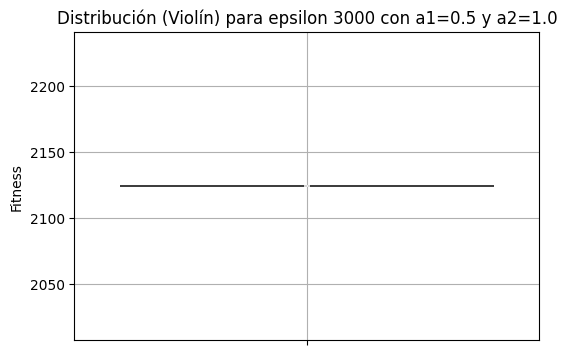

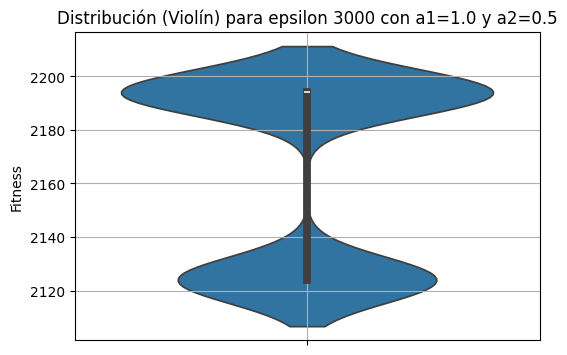

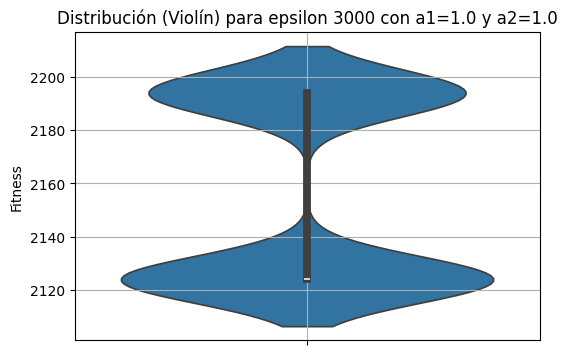

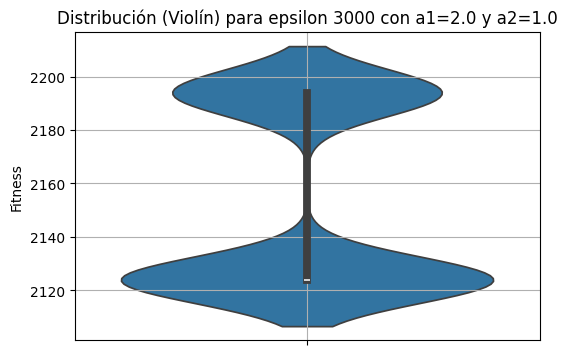

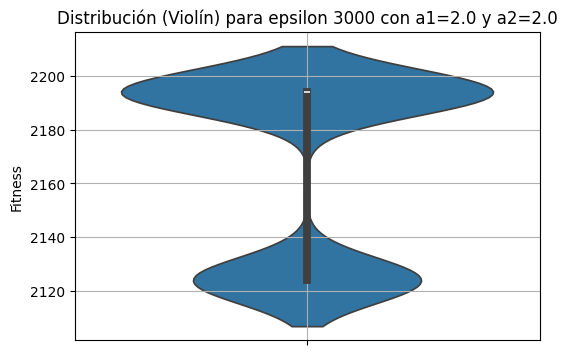

Resumen Descriptivo para epsilon
    3000 con a1=0.5 y a2=1.0    
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ Métrica             ┃ Valor  ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ Mejor Fitness       │ 2124.0 │
│ Peor Fitness        │ 2124.0 │
│ Promedio            │ 2124.0 │
│ Mediana             │ 2124.0 │
│ Desviación Estándar │ 0.0    │
└─────────────────────┴────────┘

 Resumen Descriptivo para epsilon 3000 con  
              a1=1.0 y a2=0.5               
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ Métrica             ┃ Valor              ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ Mejor Fitness       │ 2194.0             │
│ Peor Fitness        │ 2124.0             │
│ Promedio            │ 2165.3             │
│ Mediana             │ 2194.0             │
│ Desviación Estándar │ 34.445558443673065 │
└─────────────────────┴────────────────────┘

 Resumen Descriptivo para epsilon 3000 con  
              a1=1.0 y a2=1.0               
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ Métrica             ┃ Valor              ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ Mejor Fitness       │ 2194.0             │
│ Peor Fitness        │ 2124.0             │
│ Promedio            │ 2156.2             │
│ Mediana             │ 2124.0             │
│ Desviación Estándar │ 34.905277228212626 │
└─────────────────────┴────────────────────┘

Resumen Descriptivo para epsilon 3000 con 
             a1=2.0 y a2=1.0              
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃ Métrica             ┃ Valor            ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
│ Mejor Fitness       │ 2194.0           │
│ Peor Fitness        │ 2124.0           │
│ Promedio            │ 2153.4           │
│ Mediana             │ 2124.0           │
│ Desviación Estándar │ 34.5663830163764 │
└─────────────────────┴──────────────────┘

 Resumen Descriptivo para epsilon 3000 con 
              a1=2.0 y a2=2.0              
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Métrica             ┃ Valor             ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Mejor Fitness       │ 2194.0            │
│ Peor Fitness        │ 2124.0            │
│ Promedio            │ 2167.4            │
│ Mediana             │ 2194.0            │
│ Desviación Estándar │ 33.99405235619307 │
└─────────────────────┴───────────────────┘

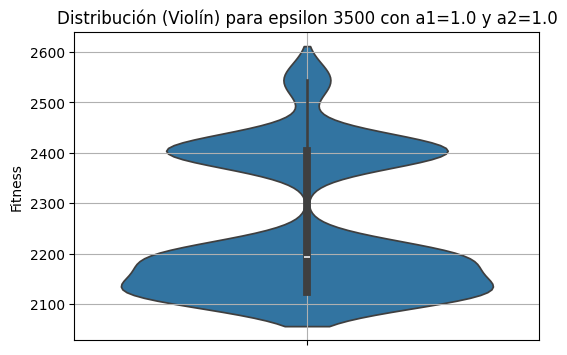

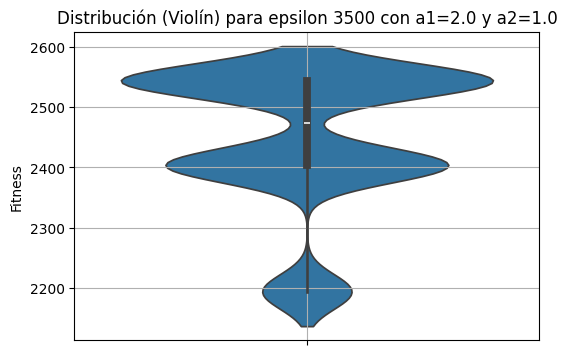

 Resumen Descriptivo para epsilon 3500 con 
              a1=1.0 y a2=1.0              
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Métrica             ┃ Valor             ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Mejor Fitness       │ 2544.0            │
│ Peor Fitness        │ 2124.0            │
│ Promedio            │ 2250.0            │
│ Mediana             │ 2194.0            │
│ Desviación Estándar │ 133.9848944916999 │
└─────────────────────┴───────────────────┘

 Resumen Descriptivo para epsilon 3500 con  
              a1=2.0 y a2=1.0               
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ Métrica             ┃ Valor              ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ Mejor Fitness       │ 2544.0             │
│ Peor Fitness        │ 2194.0             │
│ Promedio            │ 2448.8             │
│ Mediana             │ 2474.0             │
│ Desviación Estándar │ 114.44674769541534 │
└─────────────────────┴────────────────────┘

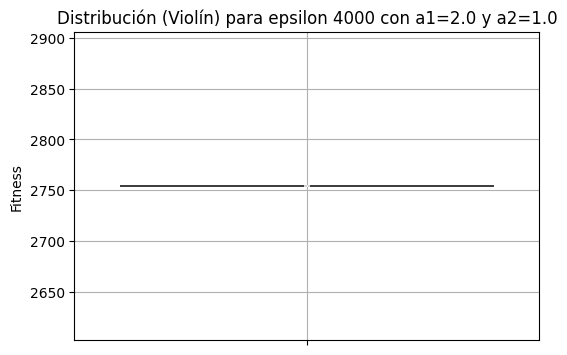

Resumen Descriptivo para epsilon
    4000 con a1=2.0 y a2=1.0    
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ Métrica             ┃ Valor  ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ Mejor Fitness       │ 2754.0 │
│ Peor Fitness        │ 2754.0 │
│ Promedio            │ 2754.0 │
│ Mediana             │ 2754.0 │
│ Desviación Estándar │ 0.0    │
└─────────────────────┴────────┘

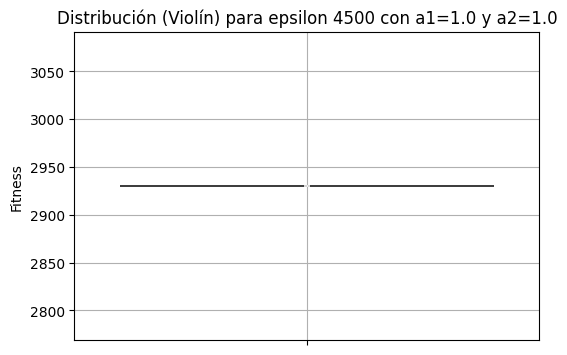

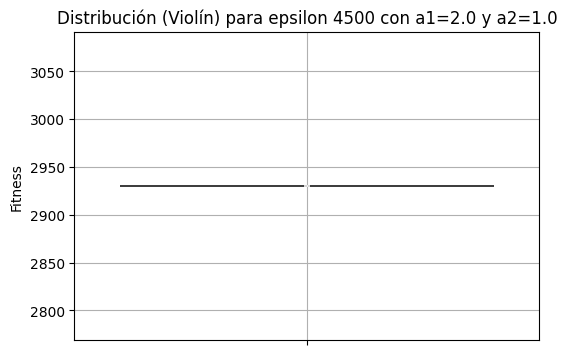

Resumen Descriptivo para epsilon
    4500 con a1=1.0 y a2=1.0    
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ Métrica             ┃ Valor  ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ Mejor Fitness       │ 2930.0 │
│ Peor Fitness        │ 2930.0 │
│ Promedio            │ 2930.0 │
│ Mediana             │ 2930.0 │
│ Desviación Estándar │ 0.0    │
└─────────────────────┴────────┘

Resumen Descriptivo para epsilon
    4500 con a1=2.0 y a2=1.0    
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ Métrica             ┃ Valor  ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ Mejor Fitness       │ 2930.0 │
│ Peor Fitness        │ 2930.0 │
│ Promedio            │ 2930.0 │
│ Mediana             │ 2930.0 │
│ Desviación Estándar │ 0.0    │
└─────────────────────┴────────┘

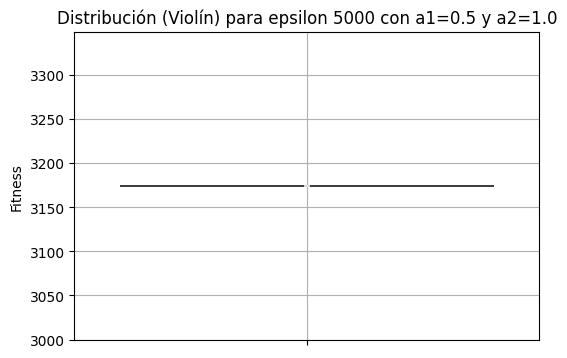

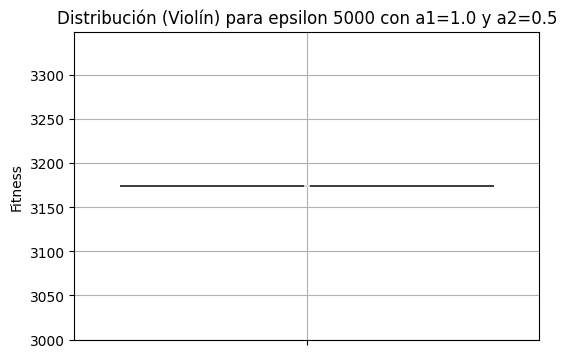

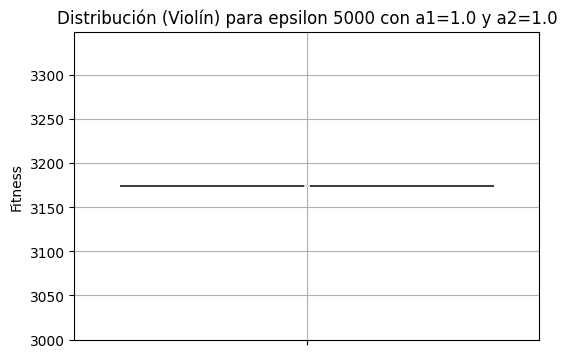

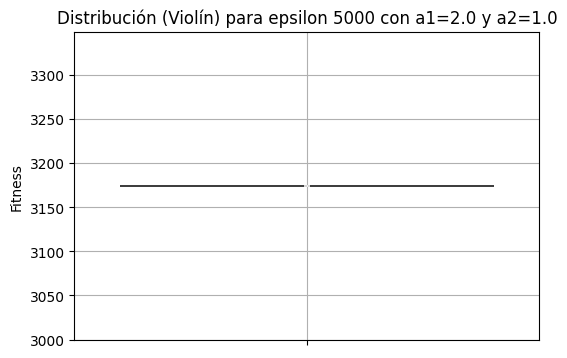

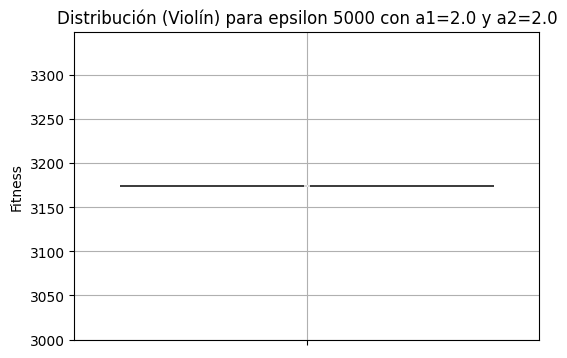

Resumen Descriptivo para epsilon
    5000 con a1=0.5 y a2=1.0    
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ Métrica             ┃ Valor  ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ Mejor Fitness       │ 3174.0 │
│ Peor Fitness        │ 3174.0 │
│ Promedio            │ 3174.0 │
│ Mediana             │ 3174.0 │
│ Desviación Estándar │ 0.0    │
└─────────────────────┴────────┘

Resumen Descriptivo para epsilon
    5000 con a1=1.0 y a2=0.5    
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ Métrica             ┃ Valor  ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ Mejor Fitness       │ 3174.0 │
│ Peor Fitness        │ 3174.0 │
│ Promedio            │ 3174.0 │
│ Mediana             │ 3174.0 │
│ Desviación Estándar │ 0.0    │
└─────────────────────┴────────┘

Resumen Descriptivo para epsilon
    5000 con a1=1.0 y a2=1.0    
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ Métrica             ┃ Valor  ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ Mejor Fitness       │ 3174.0 │
│ Peor Fitness        │ 3174.0 │
│ Promedio            │ 3174.0 │
│ Mediana             │ 3174.0 │
│ Desviación Estándar │ 0.0    │
└─────────────────────┴────────┘

Resumen Descriptivo para epsilon
    5000 con a1=2.0 y a2=1.0    
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ Métrica             ┃ Valor  ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ Mejor Fitness       │ 3174.0 │
│ Peor Fitness        │ 3174.0 │
│ Promedio            │ 3174.0 │
│ Mediana             │ 3174.0 │
│ Desviación Estándar │ 0.0    │
└─────────────────────┴────────┘

Resumen Descriptivo para epsilon
    5000 con a1=2.0 y a2=2.0    
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ Métrica             ┃ Valor  ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ Mejor Fitness       │ 3174.0 │
│ Peor Fitness        │ 3174.0 │
│ Promedio            │ 3174.0 │
│ Mediana             │ 3174.0 │
│ Desviación Estándar │ 0.0    │
└─────────────────────┴────────┘

In [16]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
from rich.console import Console
from rich.table import Table

# Directorio donde están los archivos CSV
directory = os.getcwd()
csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

# Crear una consola para la salida con rich
console = Console()

# Inicializar un diccionario para almacenar los datos
data_dict = {}

# Expresión regular para extraer los valores de epsilon, a1 y a2 de los nombres de los archivos
pattern = re.compile(r'resultados_experimentos_e_(\d+)_a1_(\d+\.?\d*)_a2_(\d+\.?\d*)\.csv')

for file in csv_files:
    match = pattern.match(file)
    if match:
        epsilon, a1, a2 = match.groups()
        
        # Convertir los valores a los tipos adecuados
        epsilon = int(epsilon)
        a1 = float(a1)
        a2 = float(a2)
        
        # Leer el archivo CSV
        filepath = os.path.join(directory, file)
        df = pd.read_csv(filepath)
        
        # Inicializar un diccionario para los datos de este epsilon si no existe
        if epsilon not in data_dict:
            data_dict[epsilon] = {}
        
        # Inicializar un DataFrame para esta combinación de a1 y a2
        key = f"{a1}-{a2}"
        if key not in data_dict[epsilon]:
            data_dict[epsilon][key] = pd.DataFrame()
        
        data_dict[epsilon][key] = pd.concat([data_dict[epsilon][key], df])

# Función para generar la tabla de resumen descriptivo
def generar_resumen_descriptivo(df):
    resumen = {
        'Mejor Fitness': df['fit'].max(),
        'Peor Fitness': df['fit'].min(),
        'Promedio': df['fit'].mean(),
        'Mediana': df['fit'].median(),
        'Desviación Estándar': df['fit'].std(),
        # 'Rango Intercuartílico': iqr(df['fit'])
    }
    return pd.Series(resumen)

# Generar los resúmenes descriptivos y visualizaciones agrupados por epsilon
for epsilon, grupos in data_dict.items():
    # Crear un contenedor para las tablas
    tablas = []
    
    for key, df in grupos.items():
        a1, a2 = key.split('-')
        a1, a2 = float(a1), float(a2)
        
        # Generar resumen descriptivo
        resumen = generar_resumen_descriptivo(df)
        
        # Crear tabla con rich
        tabla = Table(title=f"Resumen Descriptivo para epsilon {epsilon} con a1={a1} y a2={a2}", show_header=True, header_style="bold magenta")
        tabla.add_column("Métrica", justify="full", no_wrap=True)
        tabla.add_column("Valor", justify="full", no_wrap=True)

        for metrica, valor in resumen.items():
            tabla.add_row(metrica, str(valor))
        
        tablas.append(tabla)
        
        # Gráfico de violín
        plt.figure(figsize=(6, 4))
        sns.violinplot(data=df, y='fit')
        plt.title(f"Distribución (Violín) para epsilon {epsilon} con a1={a1} y a2={a2}")
        plt.ylabel("Fitness")
        plt.grid(True)
        plt.show()
    
    # Imprimir todas las tablas juntas para este epsilon
    for tabla in tablas:
        console.print(tabla)


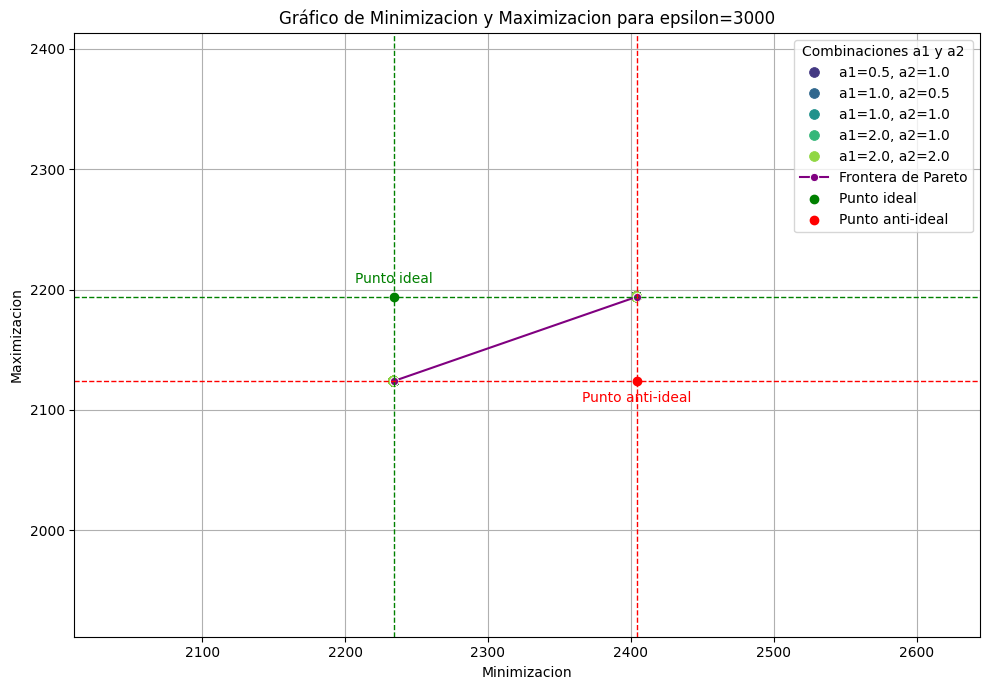

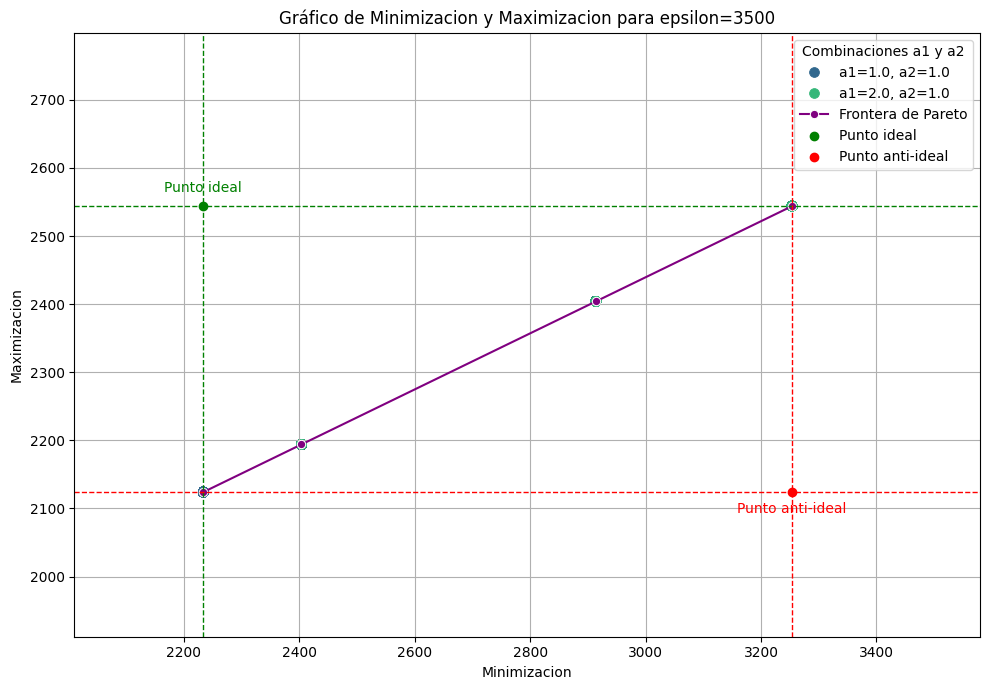

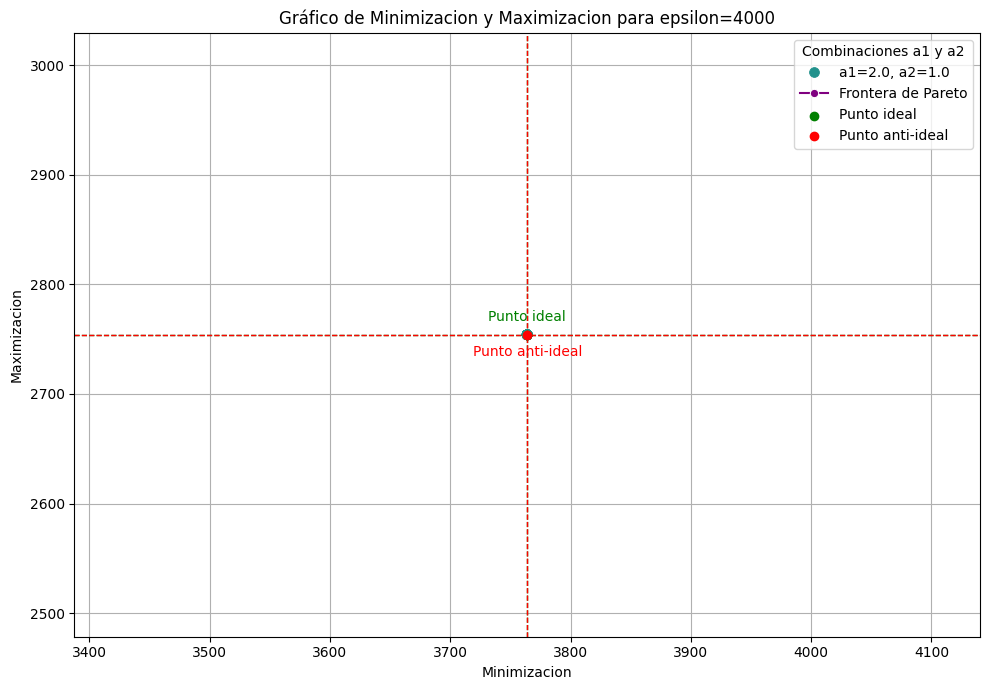

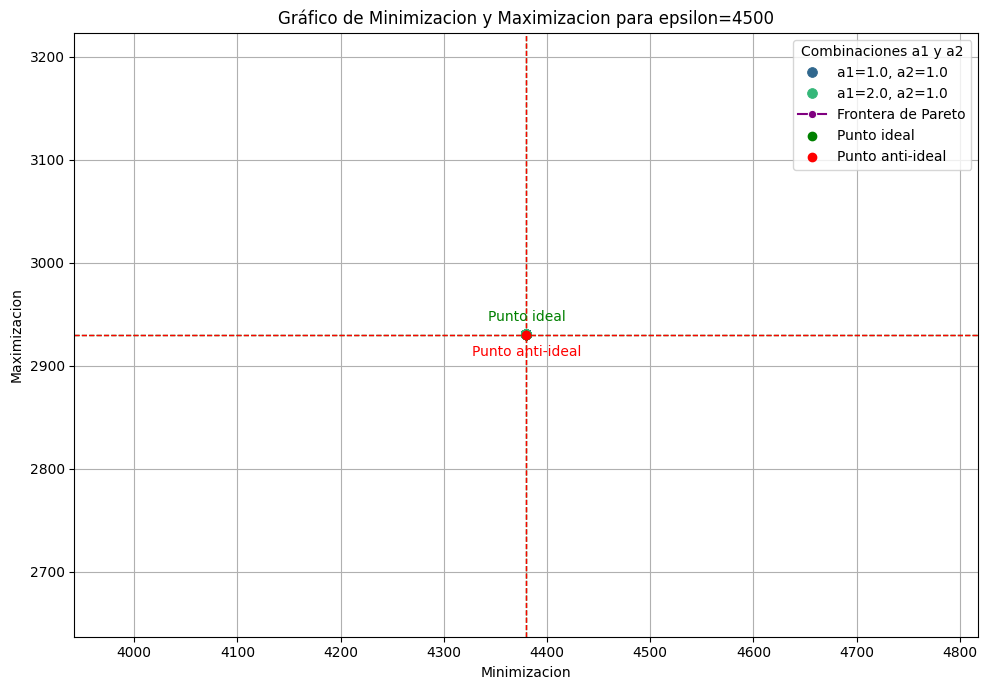

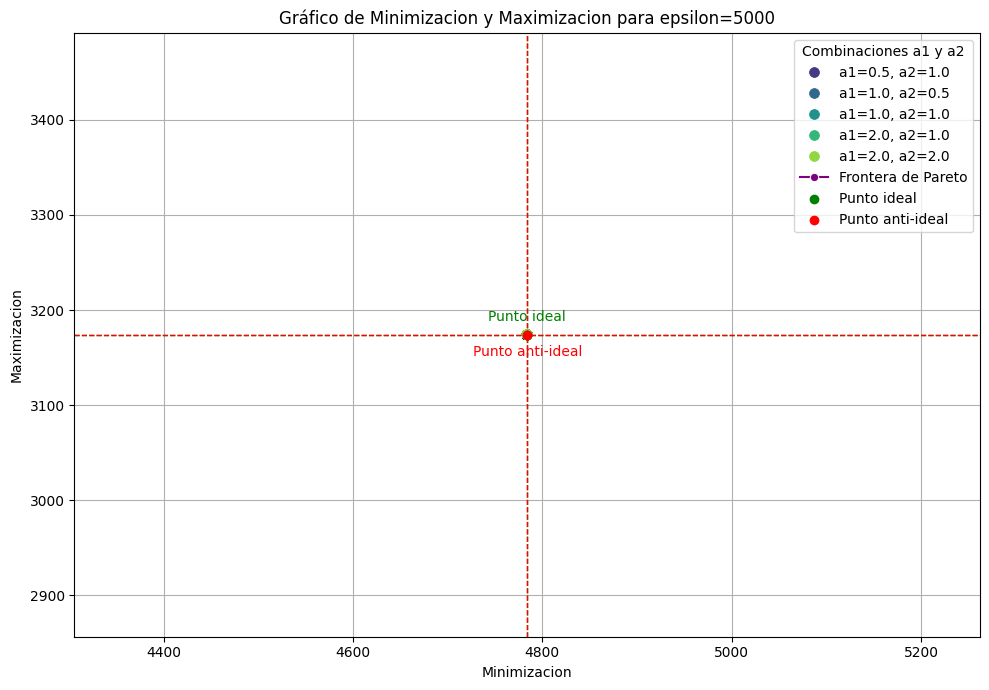

In [15]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Directorio donde están los archivos CSV
directory = os.getcwd()
csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

# Inicializar un diccionario para almacenar los datos
data_dict = {}

# Expresión regular para extraer los valores de epsilon, a1 y a2 de los nombres de los archivos
pattern = re.compile(r'resultados_experimentos_e_(\d+)_a1_(\d+\.?\d*)_a2_(\d+\.?\d*)\.csv')

# DataFrame para almacenar todos los puntos
all_data = pd.DataFrame()

for file in csv_files:
    match = pattern.match(file)
    if match:
        epsilon, a1, a2 = match.groups()
        
        # Convertir los valores a los tipos adecuados
        epsilon = int(epsilon)
        a1 = float(a1)
        a2 = float(a2)
        
        # Leer el archivo CSV
        filepath = os.path.join(directory, file)
        df = pd.read_csv(filepath)
        
        # Añadir columnas de parámetros
        df['epsilon'] = epsilon
        df['a1'] = a1
        df['a2'] = a2
        df['combinacion'] = f'a1={a1}, a2={a2}'
        
        # Concatenar al DataFrame general
        all_data = pd.concat([all_data, df], ignore_index=True)

# Función para obtener puntos ideal y anti-ideal
def get_ideal_points(df, objective1, objective2):
    ideal = {
        objective1: df[objective1].max(),
        objective2: df[objective2].min()
    }
    anti_ideal = {
        objective1: df[objective1].min(),
        objective2: df[objective2].max()
    }
    return ideal, anti_ideal

# Función para identificar la frontera de Pareto
def get_pareto_front(df, objective1, objective2):
    pareto = []
    df_sorted = df.sort_values(by=[objective2, objective1])
    pareto.append(df_sorted.iloc[0].to_dict())
    for row in df_sorted.iloc[1:].itertuples(index=False):
        if getattr(row, objective1) > pareto[-1][objective1]:
            pareto.append(row._asdict())
    return pd.DataFrame(pareto)

# Generar gráficos por cada valor de epsilon
epsilons = all_data['epsilon'].unique()
for epsilon in epsilons:
    subset = all_data[all_data['epsilon'] == epsilon]
    
    # Obtener puntos ideal y anti-ideal
    ideal, anti_ideal = get_ideal_points(subset, 'Maximizacion', 'Minimizacion')
    
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=subset, x='Minimizacion', y='Maximizacion', hue='combinacion', palette='viridis', s=50, edgecolor=None)
    
    # Obtener y graficar la frontera de Pareto
    pareto_front = get_pareto_front(subset, 'Minimizacion', 'Maximizacion')
    sns.lineplot(data=pareto_front, x='Minimizacion', y='Maximizacion', color='purple', marker='o', linestyle='-', label='Frontera de Pareto')
    
    # Anotaciones de los puntos ideal y anti-ideal
    plt.scatter(ideal['Minimizacion'], ideal['Maximizacion'], color='g', label='Punto ideal', zorder=5)
    plt.scatter(anti_ideal['Minimizacion'], anti_ideal['Maximizacion'], color='r', label='Punto anti-ideal', zorder=5)
    plt.annotate('Punto ideal', (ideal['Minimizacion'], ideal['Maximizacion']), textcoords="offset points", xytext=(0,10), ha='center', color='g')
    plt.annotate('Punto anti-ideal', (anti_ideal['Minimizacion'], anti_ideal['Maximizacion']), textcoords="offset points", xytext=(0,-15), ha='center', color='r')
    
    # Líneas punteadas para puntos ideal y anti-ideal
    plt.axhline(y=ideal['Maximizacion'], color='g', linestyle='--', linewidth=1)
    plt.axvline(x=ideal['Minimizacion'], color='g', linestyle='--', linewidth=1)
    plt.axhline(y=anti_ideal['Maximizacion'], color='r', linestyle='--', linewidth=1)
    plt.axvline(x=anti_ideal['Minimizacion'], color='r', linestyle='--', linewidth=1)
    
    # Ajuste automático de la escala con margen del 10%
    plt.xlim(subset['Minimizacion'].min() * 0.90, subset['Minimizacion'].max() * 1.10)
    plt.ylim(subset['Maximizacion'].min() * 0.90, subset['Maximizacion'].max() * 1.10)
    
    plt.title(f'Gráfico de Minimizacion y Maximizacion para epsilon={epsilon}')
    plt.xlabel('Minimizacion')
    plt.ylabel('Maximizacion')
    plt.legend(title='Combinaciones a1 y a2')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
